# Polinomal Regresyon(Polynomial Regression)



**Formül =** $f( x ) = c0 + c1*x + c2*x^2 + cn*x^n$

**Bu regresyonla, doğrusal regresyondan farklı olarak kıvrımlı bir yapı elde edebiliyoruz. Amacımız daha veriye yakın çizgiler elde edebilmek!**


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [45]:
data = pd.read_csv("maaslar.csv")
data

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500
5,Sef,6,7500
6,Mudur,7,10000
7,Direktor,8,15000
8,C-level,9,25000
9,CEO,10,50000


In [46]:
x = data.iloc[:, 1:2]#eğitim seviyesi
y = data.iloc[:, -1:]#maaş

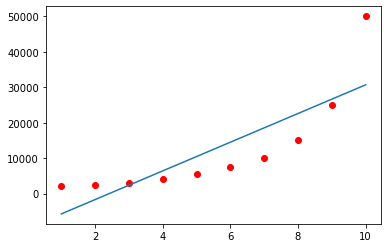

In [47]:
#Öncelikle Lineer Regresyona bakalım(baya hatalı)
lr = LinearRegression()
lr.fit(x, y)
plt.scatter(x, y, color='red')
plt.plot(x, lr.predict(x))

**Kısaca yaptığımız şey = x değerlerinin üslerini alarak x^2, x^3 gibi değerleri elde ediyoruz ve a*x + b*x1 + c*x2... haline getirerek lineer denklem haline getiriyoruz!!!**

**x değerlerine 0-10 dersek: a + b*1 + c*4 + d*9 + .... + n*100 olur!!**

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


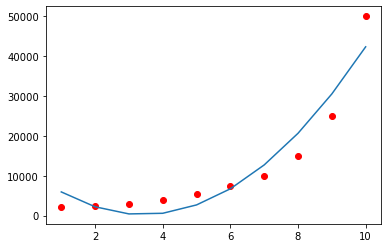

In [57]:
#Polinomal Regresyona Bakalım
lr2= LinearRegression()
pr = preprocessing.PolynomialFeatures(degree=2)#2.dereceden oluştur
#şu an x değerlerini polinomal haline getiriyoruz(yani x, x^2, x^3... x^n'e kadar giden değerler bulunuyor)
x_poly = pr.fit_transform(x)
print(x_poly)
#şu an 3 kolonun çarpanlarını öğrenen bir lineer sisteme dönüşecek
lr2.fit(x_poly, y)
plt.scatter(x, y, color='red')#noktaların dağılımı
#burada bize lineer regresyon grafiği çizeceksin ama her bir x değeri için bize o x değerinin polinomal dönüşümü lazım!!
plt.plot(x, lr2.predict(pr.fit_transform(x)))#2.dereceden polinom çizimi//pr.fit_transform yerine x_poly de yazılabilir


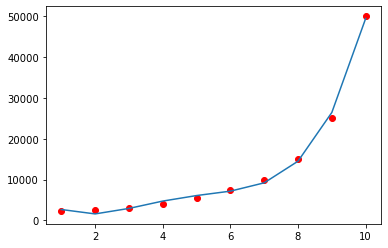

In [58]:
#aynı polinomu 4. dereceden oluşturuyoruz
#polinom derecesi arttıkça başarı oranı artıyor
pr = preprocessing.PolynomialFeatures(degree=4)
x_poly = pr.fit_transform(x)

lr2.fit(x_poly, y)
plt.scatter(x, y, color='red')
plt.plot(x, lr2.predict(pr.fit_transform(x)))

In [59]:
#peki yalnızca bir eğitim seviyesi girip o eğitim seviyesinin maaşını tahmin ettirmek istiyorsak
#öncelikle lineer olarak hesaplayalım
print(lr.predict([[11]]))#11. seviye için 34716 
print(lr.predict([[6.6]]))#6.6. seviye için 16923 gibi bir değer döndürdü
#aslında 10.seviye bile 50000 iken 11.seviye için 34716 döndürdü
#6.6. seviye 7500-10000 arası olması gerekirken 16923 döndürdü

[[34716.66666667]]
[[16923.33333333]]


In [60]:
#bir de polinomal olarak hesaplayalım
#aradığımız değeri polinomal değere dönüştürmemiz gerek!!!
print(lr2.predict(pr.fit_transform([[11]])))
print(lr2.predict(pr.fit_transform([[6.6]])))

#11. seviye için 89041 gibi bir değer döndürdü
#6.6 için 8146 değerini döndürdü

[[89041.66666665]]
[[8146.9948718]]
